<a href="https://colab.research.google.com/github/DaraSamii/machine-learning-packages-summary/blob/main/FeatureTools_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing featuretools

In [ ]:
!pip install featuretools

## installing Add-ons

* `python -m pip install "featuretools[`**`complete`**`]"`
* `python -m pip install "featuretools[`**`update_checker`**`]"`
* `python -m pip install "featuretools[`**`tsfresh`**`]"`
* `python -m pip install "featuretools[`**`categorical_encoding`**`]"`
* `python -m pip install "featuretools[`**`nlp_primitives`**`]"`
* `python -m pip install "featuretools[`**`autonormalize`**`]"`
* `python -m pip install "featuretools[`**`sklearn_transformer`**`]"`

[complete installation documentation](https://featuretools.alteryx.com/en/stable/install.html)

# Imporiting package

In [ ]:
import featuretools as ft
import pandas as pd

# making Entitysets

## example dataset

In [ ]:
data = ft.demo.load_mock_customer()
data.keys()

dict_keys(['customers', 'sessions', 'transactions', 'products'])

In [ ]:
customers_df = data['customers']
customers_df

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [ ]:
sessions_df = data['sessions']
sessions_df.head()

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30


In [ ]:
transactions_df = data['transactions']
transactions_df.head()

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54


In [ ]:
products_df = data['products']
products_df.head()

,product_id,brand
0,1,B
1,2,B
2,3,B
3,4,B
4,5,A


## creating entitysets
first we need to **Initalize** entity




In [ ]:
es = ft.EntitySet(id='customer_data')
es

Entityset: customer_data
  Entities:
  Relationships:
    No relationships


for creating entities we can use `ft.entity_from_dataframe()`

which: 
<font color=purple>
`EntitySet.entity_from_dataframe(entity_id, dataframe, index=None, variable_types=None, make_index=False, time_index=None, secondary_time_index=None, already_sorted=False)`</style>

**Parameters**
* **entity_id (str)** – Unique id to associate with this entity.

* **dataframe (pandas.DataFrame)** – Dataframe containing the data.

* **index (str, <font color=green>optional</font>)** – Name of the variable used to index the entity. If None, take the first column.

* **variable_types (dict[str -> Variable/str], <font color=green>optional</font>)** – Keys are of variable ids and values are variable types or type_strings. Used to to initialize an entity’s store.

* **make_index (bool, <font color=green>optional</font>)** – If True, assume index does not exist as a column in dataframe, and create a new column of that name using integers. Otherwise, assume index exists.

* **time_index (str, <font color=green>optional</font>)** – Name of the variable containing time data. Type must be in variables.DateTime or be able to be cast to datetime (e.g. str, float, or numeric.)

* **secondary_time_index (dict[str -> Variable],<font color=green>optional</font>)** – Name of variable containing time data to use a second time index for the entity.

* **already_sorted (bool, <font color=green>optional</font>)** – If True, assumes that input dataframe is already sorted by time. Defaults to False.



In [ ]:
es.entity_from_dataframe(entity_id="customers",dataframe=customers_df,index="customer_id",
                         variable_types = {
                             "zip_code":ft.variable_types.ZIPCode,
                             "join_date":ft.variable_types.Datetime,
                             "date_of_birth":ft.variable_types.DateOfBirth
                         })

Entityset: customer_data
  Entities:
    customers [Rows: 5, Columns: 4]
  Relationships:
    No relationships

In [ ]:
es.entity_from_dataframe(entity_id="sessions",dataframe = sessions_df,index="session_id",
                         variable_types = {
                             "customer_id":ft.variable_types.Id,
                             "device": ft.variable_types.Categorical,
                             "session_start":ft.variable_types.Datetime,
                         })

Entityset: customer_data
  Entities:
    customers [Rows: 5, Columns: 4]
    sessions [Rows: 35, Columns: 4]
  Relationships:
    No relationships

In [ ]:
es.entity_from_dataframe(entity_id = "transactions",dataframe=transactions_df,index="transaction_id",
                         variable_types = {
                             "session_id":ft.variable_types.Id,
                             "product_id":ft.variable_types.Id,
                             "transaction_time":ft.variable_types.Datetime,
                             "amount":ft.variable_types.Numeric
                         })

Entityset: customer_data
  Entities:
    customers [Rows: 5, Columns: 4]
    sessions [Rows: 35, Columns: 4]
    transactions [Rows: 500, Columns: 5]
  Relationships:
    No relationships

In [ ]:
es.entity_from_dataframe(entity_id="products",dataframe=products_df,index="product_id",
                         variable_types = {
                             "brand":ft.variable_types.Categorical
                         })

Entityset: customer_data
  Entities:
    customers [Rows: 5, Columns: 4]
    sessions [Rows: 35, Columns: 4]
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
  Relationships:
    No relationships

## pltoing entites
with `es.plot` you can easily make a graph of data

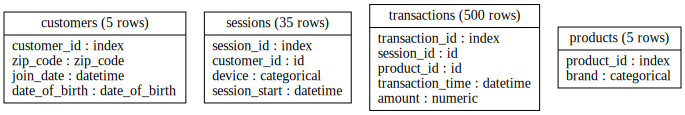

In [ ]:
es.plot()

#Relations

One -> Many

child -> parent

`ft.Relationship(parent_variable, child_variable)`

In [ ]:
rel = ft.Relationship(es["customers"]["customer_id"],es["sessions"]["customer_id"])
es.add_relationship(rel)

Entityset: customer_data
  Entities:
    customers [Rows: 5, Columns: 4]
    sessions [Rows: 35, Columns: 4]
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
  Relationships:
    sessions.customer_id -> customers.customer_id

In [ ]:
rel = ft.Relationship(es["sessions"]['session_id'],es["transactions"]["session_id"])
es.add_relationship(rel)

Entityset: customer_data
  Entities:
    customers [Rows: 5, Columns: 4]
    sessions [Rows: 35, Columns: 4]
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
  Relationships:
    sessions.customer_id -> customers.customer_id
    transactions.session_id -> sessions.session_id

In [ ]:
rel = ft.Relationship(es["products"]["product_id"],es["transactions"]["product_id"])
es.add_relationship(rel)

Entityset: customer_data
  Entities:
    customers [Rows: 5, Columns: 4]
    sessions [Rows: 35, Columns: 4]
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
  Relationships:
    sessions.customer_id -> customers.customer_id
    transactions.session_id -> sessions.session_id
    transactions.product_id -> products.product_id

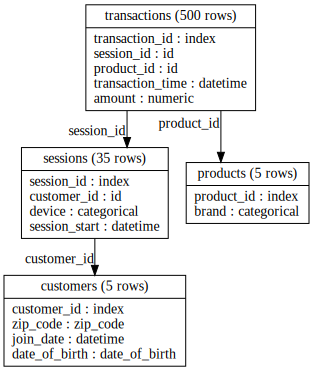

In [ ]:
es.plot()



---



---


#Variable types

In [ ]:
ft.variable_types.list_variable_types()

,name,type_string,description
0,Unknown,unknown,None
1,Discrete,discrete,Superclass representing variables that take on...
2,Categorical,categorical,Represents variables that can take an unordere...
3,Id,id,Represents variables that identify another entity
4,ZIPCode,zip_code,Represents a postal address in the United Stat...
5,CountryCode,country_code,Represents an ISO-3166 standard country code.\...
6,SubRegionCode,sub_region_code,Represents an ISO-3166 standard sub-region cod...
7,Ordinal,ordinal,Represents variables that take on an ordered d...
8,Boolean,boolean,Represents variables that take on one of two v...
9,Numeric,numeric,Represents variables that contain numeric valu...


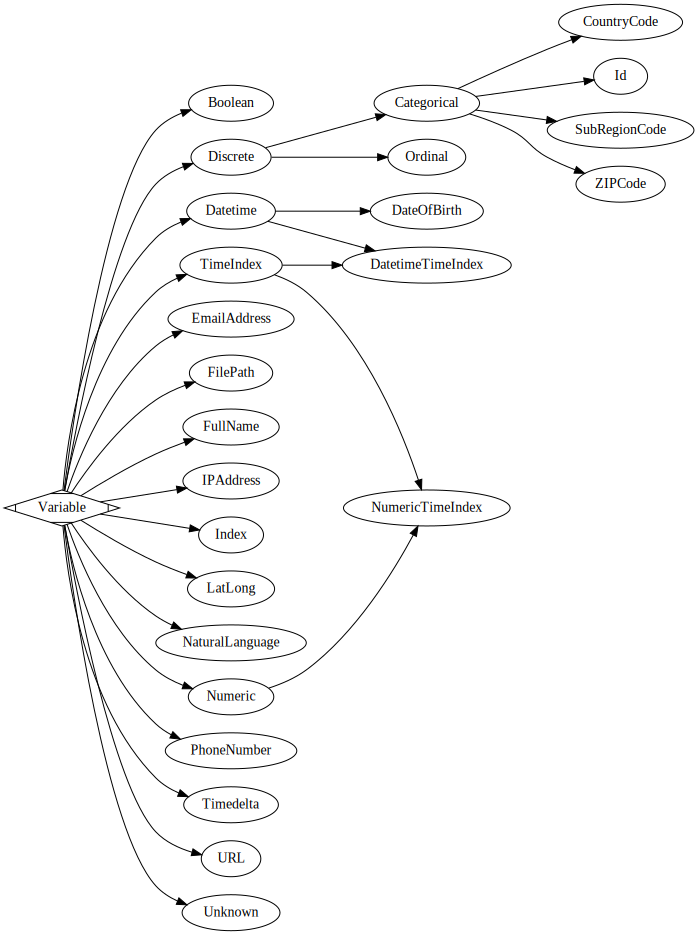

In [ ]:
ft.variable_types.graph_variable_types()

## defining custom variable

Inherit form `ft.variable_types.Variable`

and `_default_pandas_dtype` must be set

In [ ]:
class Age(ft.variable_types.Variable):
    _default_pandas_dtype = float

# Feature primitives

we have to king of primitives:

1.**<font color=orange>Aggregation primitives</font>**
>These primitives take related instances as an input and output a single value. They are applied across a parent-child relationship in an entity set. ,<font color=red>E.g: "count", "sum", "avg_time_between".</font>


2.**<font color=orange>Transform primitives</font>**
>These primitives take one or more variables from an entity as an input and output a new variable for that entity. They are applied to a single entity.,<font color=red>E.g: "hour", "time_since_previous", "absolute".</font>

## Aggregation primitives

In [ ]:
ddd =ft.list_primitives()
ddd[ddd["type"] == "aggregation"].drop(["dask_compatible","koalas_compatible"],axis=1)

,name,type,description,valid_inputs,return_type
0,min,aggregation,"Calculates the smallest value, ignoring `NaN` ...",Numeric,Numeric
1,trend,aggregation,Calculates the trend of a variable over time.,"DatetimeTimeIndex, Numeric",Numeric
2,mean,aggregation,Computes the average for a list of values.,Numeric,Numeric
3,time_since_last,aggregation,Calculates the time elapsed since the last dat...,DatetimeTimeIndex,Numeric
4,any,aggregation,Determines if any value is 'True' in a list.,Boolean,Boolean
5,first,aggregation,Determines the first value in a list.,Variable,None
6,skew,aggregation,Computes the extent to which a distribution di...,Numeric,Numeric
7,count,aggregation,"Determines the total number of values, excludi...",Index,Numeric
8,n_most_common,aggregation,Determines the `n` most common elements.,Discrete,Discrete
9,num_true,aggregation,Counts the number of `True` values.,Boolean,Numeric


## Transform primitives

In [ ]:
ddd =ft.list_primitives()
ddd[ddd["type"] != "aggregation"].drop(["dask_compatible","koalas_compatible"],axis=1)[0:30]

,name,type,description,valid_inputs,return_type
22,cum_max,transform,Calculates the cumulative maximum.,Numeric,Numeric
23,subtract_numeric_scalar,transform,Subtract a scalar from each element in the list.,Numeric,Numeric
24,time_since,transform,Calculates time from a value to a specified cu...,Datetime,Numeric
25,add_numeric_scalar,transform,Add a scalar to each value in the list.,Numeric,Numeric
26,cum_mean,transform,Calculates the cumulative mean.,Numeric,Numeric
27,is_null,transform,Determines if a value is null.,Variable,Boolean
28,num_characters,transform,Calculates the number of characters in a string.,NaturalLanguage,Numeric
29,cum_sum,transform,Calculates the cumulative sum.,Numeric,Numeric
30,is_free_email_domain,transform,Determines if an email address is from a free ...,EmailAddress,Boolean
31,is_weekend,transform,Determines if a date falls on a weekend.,Datetime,Boolean


In [ ]:
ddd[ddd["type"] != "aggregation"].drop(["dask_compatible","koalas_compatible"],axis=1)[30:61]

,name,type,description,valid_inputs,return_type
52,isin,transform,Determines whether a value is present in a pro...,Variable,Boolean
53,scalar_subtract_numeric_feature,transform,Subtract each value in the list from a given s...,Numeric,Numeric
54,cum_min,transform,Calculates the cumulative minimum.,Numeric,Numeric
55,num_words,transform,Determines the number of words in a string by ...,NaturalLanguage,Numeric
56,subtract_numeric,transform,Element-wise subtraction of two lists.,Numeric,Numeric
57,add_numeric,transform,Element-wise addition of two lists.,Numeric,Numeric
58,cum_count,transform,Calculates the cumulative count.,"Id, Discrete",Numeric
59,weekday,transform,Determines the day of the week from a datetime.,Datetime,Ordinal
60,not_equal,transform,Determines if values in one list are not equal...,Variable,Boolean
61,or,transform,Element-wise logical OR of two lists.,Boolean,Boolean


## defining custom Primitives

### Agregation Primitive

we need to Inherit from `ft.primitives.AggregationPrimitive`.

specify `name`, list of `input_types` and `return_type`.

`get_function` method will return the function which a column array will be passed in to it.

In [ ]:
class Maximum(ft.primitives.AggregationPrimitive):
    name = 'maximum'
    input_types = [ft.variable_types.Numeric]
    return_type = ft.variable_types.Numeric

    def get_function(self):
        def maximum(column):
            return max(column)

        return maximum

### Transform Primitive

first we need to inherit from `ft.primitives.TransformPrimitive`.

then specify `name`, list of `input_types` and `return_type`.

`get_function` method must return a function which is going to be applied to each row of the `column` passed to it.

In [ ]:
class WordCount(ft.primitives.TransformPrimitive):
    '''
    Counts the number of words in each row of the column. Returns a list
    of the counts for each row.
    '''
    name = 'word_count'
    input_types = [NaturalLanguage]
    return_type = Numeric

    def get_function(self):
        def word_count(column):
            word_counts = []
            for value in column:
                words = value.split(None)
                word_counts.append(len(words))
            return word_counts

        return word_count

# Deep Feature Syntesis

In [ ]:
ft.primitives.get_default_aggregation_primitives()

[featuretools.primitives.standard.aggregation_primitives.Sum,
 featuretools.primitives.standard.aggregation_primitives.Std,
 featuretools.primitives.standard.aggregation_primitives.Max,
 featuretools.primitives.standard.aggregation_primitives.Skew,
 featuretools.primitives.standard.aggregation_primitives.Min,
 featuretools.primitives.standard.aggregation_primitives.Mean,
 featuretools.primitives.standard.aggregation_primitives.Count,
 featuretools.primitives.standard.aggregation_primitives.PercentTrue,
 featuretools.primitives.standard.aggregation_primitives.NumUnique,
 featuretools.primitives.standard.aggregation_primitives.Mode]

In [ ]:
ft.primitives.get_default_transform_primitives()

[featuretools.primitives.standard.transform_primitive.Age,
 featuretools.primitives.standard.transform_primitive.Day,
 featuretools.primitives.standard.transform_primitive.Year,
 featuretools.primitives.standard.transform_primitive.Month,
 featuretools.primitives.standard.transform_primitive.Weekday,
 featuretools.primitives.standard.transform_primitive.Haversine,
 featuretools.primitives.standard.transform_primitive.NumWords,
 featuretools.primitives.standard.transform_primitive.NumCharacters]

we use `ft.dfs` to perform deep feature synthesis

this function return two values, first featurea_matrix and second list of features
[full doc](https://featuretools.alteryx.com/en/stable/generated/featuretools.dfs.html#featuretools.dfs)

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="transactions",
                                      agg_primitives = ["mean", "sum", "mode","min",'max'], #if set None will set to ft.primitives.get_default_aggregation_primitives()
                                      trans_primitives=["month", "hour","day","weekday"], # if set to None will set to ft.primitives.get_default_transform_primitives()
                                      max_depth = 2)

In [ ]:
feature_matrix

,session_id,product_id,amount,DAY(transaction_time),HOUR(transaction_time),MONTH(transaction_time),WEEKDAY(transaction_time),sessions.customer_id,sessions.device,products.brand,sessions.MAX(transactions.amount),sessions.MEAN(transactions.amount),sessions.MIN(transactions.amount),sessions.MODE(transactions.product_id),sessions.SUM(transactions.amount),sessions.DAY(session_start),sessions.HOUR(session_start),sessions.MONTH(session_start),sessions.WEEKDAY(session_start),sessions.customers.zip_code,products.MAX(transactions.amount),products.MEAN(transactions.amount),products.MIN(transactions.amount),products.MODE(transactions.session_id),products.SUM(transactions.amount)
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,
298,1,5,127.64,1,0,1,2,2,desktop,A,141.66,76.813125,20.91,3,1229.01,1,0,1,2,13244,149.02,76.264904,5.91,4,7931.55
2,1,2,109.48,1,0,1,2,2,desktop,B,141.66,76.813125,20.91,3,1229.01,1,0,1,2,13244,149.95,76.319891,5.73,28,7021.43
308,1,3,95.06,1,0,1,2,2,desktop,B,141.66,76.813125,20.91,3,1229.01,1,0,1,2,13244,148.31,73.001250,5.89,1,7008.12
116,1,4,78.92,1,0,1,2,2,desktop,B,141.66,76.813125,20.91,3,1229.01,1,0,1,2,13244,146.46,76.311038,5.81,29,8088.97
371,1,3,31.54,1,0,1,2,2,desktop,B,141.66,76.813125,20.91,3,1229.01,1,0,1,2,13244,148.31,73.001250,5.89,1,7008.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,35,5,55.42,1,8,1,2,3,mobile,A,148.31,60.041875,10.94,5,960.67,1,8,1,2,13244,149.02,76.264904,5.91,4,7931.55
111,35,3,34.87,1,8,1,2,3,mobile,B,148.31,60.041875,10.94,5,960.67,1,8,1,2,13244,148.31,73.001250,5.89,1,7008.12
276,35,1,10.94,1,8,1,2,3,mobile,B,148.31,60.041875,10.94,5,960.67,1,8,1,2,13244,149.56,73.429314,6.84,3,7489.79


In [ ]:
feature_defs

[<Feature: session_id>,
 <Feature: product_id>,
 <Feature: amount>,
 <Feature: DAY(transaction_time)>,
 <Feature: HOUR(transaction_time)>,
 <Feature: MONTH(transaction_time)>,
 <Feature: WEEKDAY(transaction_time)>,
 <Feature: sessions.customer_id>,
 <Feature: sessions.device>,
 <Feature: products.brand>,
 <Feature: sessions.MAX(transactions.amount)>,
 <Feature: sessions.MEAN(transactions.amount)>,
 <Feature: sessions.MIN(transactions.amount)>,
 <Feature: sessions.MODE(transactions.product_id)>,
 <Feature: sessions.SUM(transactions.amount)>,
 <Feature: sessions.DAY(session_start)>,
 <Feature: sessions.HOUR(session_start)>,
 <Feature: sessions.MONTH(session_start)>,
 <Feature: sessions.WEEKDAY(session_start)>,
 <Feature: sessions.customers.zip_code>,
 <Feature: products.MAX(transactions.amount)>,
 <Feature: products.MEAN(transactions.amount)>,
 <Feature: products.MIN(transactions.amount)>,
 <Feature: products.MODE(transactions.session_id)>,
 <Feature: products.SUM(transactions.amount)>]

## Ploting features

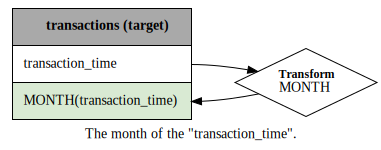

In [ ]:
ft.graph_feature(feature_defs[5],description=True)

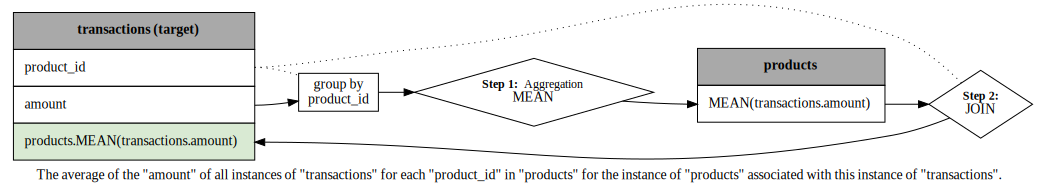

In [ ]:
ft.graph_feature(feature_defs[-4],description=True)

# add interesting values

In [ ]:
es["sessions"]["device"].interesting_values = ["desktop", "mobile", "tablet"]

we use `where_primitves` to choose **primitives** we want to apply to interesting values

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="customers",
                                      agg_primitives=["count", "avg_time_between"],
                                      trans_primitives=["day","age"],
                                      where_primitives=["count", "avg_time_between"],
                                      max_depth=3)
feature_matrix

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/dfs.py:307: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['avg_time_between']
  where_primitives: ['avg_time_between']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


,zip_code,COUNT(sessions),COUNT(transactions),AGE(date_of_birth),DAY(date_of_birth),DAY(join_date),COUNT(sessions WHERE device = desktop),COUNT(sessions WHERE device = mobile),COUNT(sessions WHERE device = tablet),COUNT(transactions WHERE sessions.device = tablet),COUNT(transactions WHERE sessions.device = mobile),COUNT(transactions WHERE sessions.device = desktop)
customer_id,,,,,,,,,,,,
1,60091,8,126,27.027397,18,17,2,3,3,43,56,27
2,13244,7,93,34.947945,18,15,3,2,2,28,31,34
3,13244,6,93,17.676712,21,13,4,1,1,15,16,62
4,60091,8,109,14.942466,15,8,3,4,1,18,53,38
5,60091,6,79,37.005479,28,17,2,3,1,14,36,29


## More dfs Options

* [Specifying Entities for Individual Primitives](https://featuretools.alteryx.com/en/stable/guides/specifying_primitive_options.html#specifying-entities-for-individual-primitives)

* [Specifying Columns for Individual Primitives](https://featuretools.alteryx.com/en/stable/guides/specifying_primitive_options.html#specifying-columns-for-individual-primitives)

* [Specifying GroupBy Options](https://featuretools.alteryx.com/en/stable/guides/specifying_primitive_options.html#specifying-groupby-options)

* [Specifying for each Input for Multiple Input Primitives](https://featuretools.alteryx.com/en/stable/guides/specifying_primitive_options.html#specifying-for-each-input-for-multiple-input-primitives)

#Feature Selection

* `ft.selection.remove_highly_null_features(feature_matrix, pct_null_threshold=0.95)`

* `ft.selection.remove_single_value_features(feature_matrix, features=None, count_nan_as_value=False)`

* `ft.selection.remove_highly_correlated_features(feature_matrix, pct_corr_threshold=0.95)`

In [ ]:
es = ft.demo.load_flight(nrows=50)
es

Entityset: Flight Data
  Entities:
    trip_logs [Rows: 50, Columns: 21]
    flights [Rows: 6, Columns: 9]
    airlines [Rows: 1, Columns: 1]
    airports [Rows: 4, Columns: 3]
  Relationships:
    trip_logs.flight_id -> flights.flight_id
    flights.carrier -> airlines.carrier
    flights.dest -> airports.dest

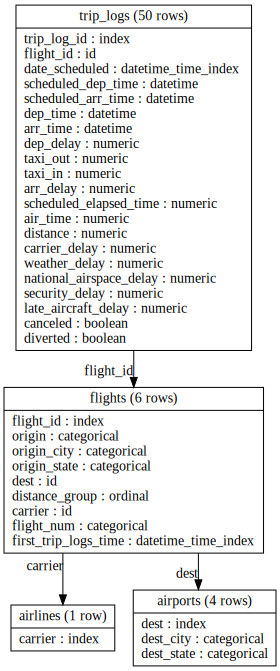

In [ ]:
es.plot()

for example we create a dataset with lots of Null calues

## remove highly null features

In [ ]:
fm, features = ft.dfs(entityset=es,
                          target_entity="trip_logs",
                          cutoff_time=pd.DataFrame({
                              'trip_log_id':[30, 1, 2, 3, 4],
                              'time':pd.to_datetime(['2016-09-22 00:00:00']*5)
                                                  }),
                          trans_primitives=[],
                          agg_primitives=[],
                          max_depth=2)
fm

,flight_id,dep_delay,taxi_out,taxi_in,arr_delay,scheduled_elapsed_time,air_time,distance,carrier_delay,weather_delay,national_airspace_delay,security_delay,late_aircraft_delay,canceled,diverted,flights.origin,flights.origin_city,flights.origin_state,flights.dest,flights.distance_group,flights.carrier,flights.flight_num,flights.airports.dest_city,flights.airports.dest_state
trip_log_id,,,,,,,,,,,,,,,,,,,,,,,,
30,AA-494:RSW->CLT,NaN,NaN,NaN,NaN,6.660000e+12,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RSW,"Fort Myers, FL",FL,CLT,3.0,AA,494.0,"Charlotte, NC",NC
1,AA-494:CLT->PHX,NaN,NaN,NaN,NaN,1.662000e+13,NaN,1773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLT,"Charlotte, NC",NC,PHX,8.0,AA,494.0,"Phoenix, AZ",AZ
2,AA-494:CLT->PHX,NaN,NaN,NaN,NaN,1.662000e+13,NaN,1773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLT,"Charlotte, NC",NC,PHX,8.0,AA,494.0,"Phoenix, AZ",AZ
3,AA-494:CLT->PHX,NaN,NaN,NaN,NaN,1.662000e+13,NaN,1773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLT,"Charlotte, NC",NC,PHX,8.0,AA,494.0,"Phoenix, AZ",AZ
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nfm = ft.selection.remove_highly_null_features(fm,pct_null_threshold=0.8)
nfm.head()

,flight_id,scheduled_elapsed_time,distance,flights.origin,flights.origin_city,flights.origin_state,flights.dest,flights.distance_group,flights.carrier,flights.flight_num,flights.airports.dest_city,flights.airports.dest_state
trip_log_id,,,,,,,,,,,,
30,AA-494:RSW->CLT,6.660000e+12,600.0,RSW,"Fort Myers, FL",FL,CLT,3.0,AA,494.0,"Charlotte, NC",NC
1,AA-494:CLT->PHX,1.662000e+13,1773.0,CLT,"Charlotte, NC",NC,PHX,8.0,AA,494.0,"Phoenix, AZ",AZ
2,AA-494:CLT->PHX,1.662000e+13,1773.0,CLT,"Charlotte, NC",NC,PHX,8.0,AA,494.0,"Phoenix, AZ",AZ
3,AA-494:CLT->PHX,1.662000e+13,1773.0,CLT,"Charlotte, NC",NC,PHX,8.0,AA,494.0,"Phoenix, AZ",AZ
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(nfm.shape)
print(fm.shape)

(5, 12)
(5, 24)


## Remove Single Value Features

a features list must be passed to `remove_single_value_features` 
it can be second object thats `_,feautres = ft.dfs()` returns

In [ ]:
new_fm, new_features = ft.selection.remove_single_value_features(fm, features=features,)

print(fm.shape)
print(new_fm.shape)

(5, 24)
(5, 10)


## Remove highly corolated features

In [ ]:
fm, features = ft.dfs(entityset=es,
                          target_entity="trip_logs",
                          trans_primitives=['negate'],
                          agg_primitives=[],
                          max_depth=3)
fm.head()

,flight_id,dep_delay,taxi_out,taxi_in,arr_delay,scheduled_elapsed_time,air_time,distance,carrier_delay,weather_delay,national_airspace_delay,security_delay,late_aircraft_delay,canceled,diverted,-(air_time),-(arr_delay),-(carrier_delay),-(dep_delay),-(distance),-(late_aircraft_delay),-(national_airspace_delay),-(scheduled_elapsed_time),-(security_delay),-(taxi_in),-(taxi_out),-(weather_delay),flights.origin,flights.origin_city,flights.origin_state,flights.dest,flights.distance_group,flights.carrier,flights.flight_num,flights.airports.dest_city,flights.airports.dest_state
trip_log_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,AA-494:RSW->CLT,-11.0,12.0,10.0,-12.0,6660000000000,88.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-88.0,12.0,-0.0,11.0,-600.0,-0.0,-0.0,-6660000000000,-0.0,-10.0,-12.0,-0.0,RSW,"Fort Myers, FL",FL,CLT,3,AA,494,"Charlotte, NC",NC
38,AA-495:ATL->PHX,-6.0,28.0,5.0,1.0,15000000000000,224.0,1587.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-224.0,-1.0,-0.0,6.0,-1587.0,-0.0,-0.0,-15000000000000,-0.0,-5.0,-28.0,-0.0,ATL,"Atlanta, GA",GA,PHX,7,AA,495,"Phoenix, AZ",AZ
46,AA-495:CLT->ATL,-2.0,18.0,8.0,-3.0,4620000000000,50.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-50.0,3.0,-0.0,2.0,-226.0,-0.0,-0.0,-4620000000000,-0.0,-8.0,-18.0,-0.0,CLT,"Charlotte, NC",NC,ATL,1,AA,495,"Atlanta, GA",GA
31,AA-494:RSW->CLT,0.0,11.0,10.0,-3.0,6660000000000,87.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-87.0,3.0,-0.0,-0.0,-600.0,-0.0,-0.0,-6660000000000,-0.0,-10.0,-11.0,-0.0,RSW,"Fort Myers, FL",FL,CLT,3,AA,494,"Charlotte, NC",NC
39,AA-495:ATL->PHX,-4.0,26.0,3.0,10.0,15000000000000,235.0,1587.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-235.0,-10.0,-0.0,4.0,-1587.0,-0.0,-0.0,-15000000000000,-0.0,-3.0,-26.0,-0.0,ATL,"Atlanta, GA",GA,PHX,7,AA,495,"Phoenix, AZ",AZ


In [ ]:
new_fm, new_features = ft.selection.remove_highly_correlated_features(fm, features=features)
new_fm.head()

,flight_id,dep_delay,taxi_out,taxi_in,arr_delay,scheduled_elapsed_time,carrier_delay,weather_delay,national_airspace_delay,security_delay,late_aircraft_delay,canceled,diverted,-(security_delay),-(weather_delay),flights.origin,flights.origin_city,flights.origin_state,flights.dest,flights.carrier,flights.flight_num,flights.airports.dest_city,flights.airports.dest_state
trip_log_id,,,,,,,,,,,,,,,,,,,,,,,
30,AA-494:RSW->CLT,-11.0,12.0,10.0,-12.0,6660000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,RSW,"Fort Myers, FL",FL,CLT,AA,494,"Charlotte, NC",NC
38,AA-495:ATL->PHX,-6.0,28.0,5.0,1.0,15000000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,ATL,"Atlanta, GA",GA,PHX,AA,495,"Phoenix, AZ",AZ
46,AA-495:CLT->ATL,-2.0,18.0,8.0,-3.0,4620000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,CLT,"Charlotte, NC",NC,ATL,AA,495,"Atlanta, GA",GA
31,AA-494:RSW->CLT,0.0,11.0,10.0,-3.0,6660000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,RSW,"Fort Myers, FL",FL,CLT,AA,494,"Charlotte, NC",NC
39,AA-495:ATL->PHX,-4.0,26.0,3.0,10.0,15000000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,ATL,"Atlanta, GA",GA,PHX,AA,495,"Phoenix, AZ",AZ


In [ ]:
print(fm.shape)
print(new_fm.shape)

(50, 36)
(50, 23)
